<a href="https://colab.research.google.com/github/IslamTayeb/life-edit-gene-classifier/blob/main/Code/NLP/LifeEdit_NLP_Gene_Description_Processor_100_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
raw_annotation = pd.read_csv("/content/drive/MyDrive/LifeEdit Personal/Human.GRCh38.p13.annot.tsv", sep = '\t')

<ipython-input-3-fc0d9f0bafd2>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_annotation = pd.read_csv("/content/drive/MyDrive/LifeEdit Personal/Human.GRCh38.p13.annot.tsv", sep = '\t')


In [4]:
raw_annotation

,GeneID,Symbol,Description,Synonyms,GeneType,EnsemblGeneID,Status,ChrAcc,ChrStart,ChrStop,Orientation,Length,GOFunctionID,GOProcessID,GOComponentID,GOFunction,GOProcess,GOComponent
0,100287102,DDX11L1,DEAD/H-box helicase 11 like 1 (pseudogene),NaN,pseudo,ENSG00000290825,active,NC_000001.11,11874,14409,positive,1652,NaN,NaN,NaN,NaN,NaN,NaN
1,653635,WASH7P,"WASP family homolog 7, pseudogene",FAM39F|WASH5P,pseudo,NaN,active,NC_000001.11,14362,29370,negative,1769,NaN,NaN,NaN,NaN,NaN,NaN
2,102466751,MIR6859-1,microRNA 6859-1,hsa-mir-6859-1,ncRNA,ENSG00000278267,active,NC_000001.11,17369,17436,negative,68,NaN,NaN,NaN,NaN,NaN,NaN
3,107985730,MIR1302-2HG,MIR1302-2 host gene,NaN,ncRNA,NaN,active,NC_000001.11,29926,31295,positive,538,NaN,NaN,NaN,NaN,NaN,NaN
4,100302278,MIR1302-2,microRNA 1302-2,MIRN1302-2|hsa-mir-1302-2,ncRNA,ENSG00000284332,active,NC_000001.11,30366,30503,positive,138,NaN,GO:0035195,NaN,NaN,miRNA-mediated gene silencing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39371,4541,ND6,NADH dehydrogenase subunit 6,MTND6,protein-coding,NaN,active,NC_012920.1,14149,14673,negative,525,GO:0008137,GO:0006120///GO:0009060///GO:0032981///GO:0035...,GO:0005739///GO:0005743///GO:0005747,NADH dehydrogenase (ubiquinone) activity,"mitochondrial electron transport, NADH to ubiq...",mitochondrion///mitochondrial inner membrane//...
39372,4556,TRNE,tRNA-Glu,MTTE,tRNA,NaN,active,NC_012920.1,14674,14742,negative,69,NaN,NaN,NaN,NaN,NaN,NaN
39373,4519,CYTB,cytochrome b,MTCYB,protein-coding,NaN,active,NC_012920.1,14747,15887,positive,1141,GO:0008121///GO:0046872,GO:0006122///GO:0045333///GO:1902600,GO:0005739///GO:0005743///GO:0005750///GO:0016020,ubiquinol-cytochrome-c reductase activity///me...,"mitochondrial electron transport, ubiquinol to...",mitochondrion///mitochondrial inner membrane//...
39374,4576,TRNT,tRNA-Thr,MTTT,tRNA,NaN,active,NC_012920.1,15888,15953,positive,66,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Cleaning**


In [5]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset
df = raw_annotation

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean and tokenize descriptions
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)  # Convert non-string values to strings

    # Keep only alphanumeric characters and underscores
    text = re.sub(r'[^a-zA-Z0-9_ ]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the cleaning function
df['cleaned_description'] = df['Description'].apply(clean_text)
print(df[['Description', 'cleaned_description']].head(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                        Description  \
0        DEAD/H-box helicase 11 like 1 (pseudogene)   
1                 WASP family homolog 7, pseudogene   
2                                   microRNA 6859-1   
3                               MIR1302-2 host gene   
4                                   microRNA 1302-2   
5      family with sequence similarity 138 member A   
6  olfactory receptor family 4 subfamily F member 5   
7                 WAS protein family homolog 2-like   
8                         uncharacterized LOC729737   
9       DEAD/H-box helicase 11 like 17 (pseudogene)   

                                cleaned_description  
0          dead h box helicase 11 like 1 pseudogene  
1                  wasp family homolog 7 pseudogene  
2                                   microrna 6859 1  
3                               mir1302 2 host gene  
4                                   microrna 1302 2  
5             family sequence similarity 138 member  
6  olfactory rec

# **Feature Extraction**

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_description'])

# Convert to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


# **K-Means Clustering**

In [7]:
from sklearn.cluster import KMeans

# Set number of clusters to around 50
num_clusters = 100
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)  # or embedding_matrix if using embeddings

# Assign cluster labels to the dataframe
df['cluster'] = clusters

In [8]:
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['Description'].head(50))  # Display 10 samples per cluster

Streaming output truncated to the last 5000 lines.
133    uncharacterized LOC107985732
134    uncharacterized LOC105378600
135    uncharacterized LOC105378598
136    uncharacterized LOC107984904
137    uncharacterized LOC105378599
142    uncharacterized LOC105378606
143    uncharacterized LOC107984909
144    uncharacterized LOC105378605
145    uncharacterized LOC105378604
148    uncharacterized LOC105378608
169    uncharacterized LOC105376674
174    uncharacterized LOC102724429
176    uncharacterized LOC105376682
177    uncharacterized LOC107984911
178    uncharacterized LOC105376686
200    uncharacterized LOC107984912
203    uncharacterized LOC107984913
213    uncharacterized LOC105376691
221    uncharacterized LOC107984915
223    uncharacterized LOC105376695
231    uncharacterized LOC112268261
245    uncharacterized LOC105376712
251    uncharacterized LOC105376717
267    uncharacterized LOC105376733
268    uncharacterized LOC105376735
279    uncharacterized LOC105376737
280    unchar

# **Supervised Model for Classification**

In [10]:
# Assign more descriptive and detailed labels to each cluster
df['function_label'] = None  # Initialize a new column for functional labels

# Assign labels for each cluster
df.loc[df['cluster'] == 0, 'function_label'] = 'Uncharacterized or Hypothetical Proteins'
df.loc[df['cluster'] == 1, 'function_label'] = 'MicroRNA Regulatory Elements'
df.loc[df['cluster'] == 2, 'function_label'] = 'Antisense RNA Transcripts'
df.loc[df['cluster'] == 3, 'function_label'] = 'Protein Family Members'
df.loc[df['cluster'] == 4, 'function_label'] = 'Cellular and Structural Proteins'
df.loc[df['cluster'] == 5, 'function_label'] = 'Pseudogenes'
df.loc[df['cluster'] == 6, 'function_label'] = 'Long Intergenic Non-Coding RNAs (lincRNAs)'
df.loc[df['cluster'] == 7, 'function_label'] = 'Genes with Undefined or Missing Annotations'
df.loc[df['cluster'] == 8, 'function_label'] = 'Proteins Associated with Cellular Processes'
df.loc[df['cluster'] == 9, 'function_label'] = 'Domain-Containing Structural Proteins'
df.loc[df['cluster'] == 10, 'function_label'] = 'Transmembrane and Transport Proteins'
df.loc[df['cluster'] == 11, 'function_label'] = 'Zinc Finger Proteins and Transcription Regulators'
df.loc[df['cluster'] == 12, 'function_label'] = 'Proteins with Sequence Homology'
df.loc[df['cluster'] == 13, 'function_label'] = 'Chromosome Open Reading Frame (C1ORF) Genes'
df.loc[df['cluster'] == 14, 'function_label'] = 'Multi-Functional Receptors and Signaling Proteins'
df.loc[df['cluster'] == 15, 'function_label'] = 'Translation and Elongation Factors'
df.loc[df['cluster'] == 16, 'function_label'] = 'DNA and Protein Binding Factors'
df.loc[df['cluster'] == 17, 'function_label'] = 'Olfactory Receptor Genes'
df.loc[df['cluster'] == 18, 'function_label'] = 'Zinc Finger Proteins Involved in Gene Regulation'
df.loc[df['cluster'] == 19, 'function_label'] = 'Proteins with “Like” Functional Characteristics'
df.loc[df['cluster'] == 20, 'function_label'] = 'Ribosomal and Mitochondrial Ribosomal Proteins'
df.loc[df['cluster'] == 21, 'function_label'] = 'Receptor and Signaling Proteins'
df.loc[df['cluster'] == 22, 'function_label'] = 'Small Nucleolar RNAs (snoRNAs)'
df.loc[df['cluster'] == 23, 'function_label'] = 'Tyrosine Kinase and Related Signaling Proteins'
df.loc[df['cluster'] == 24, 'function_label'] = 'Myosin and Muscle-Associated Proteins'
df.loc[df['cluster'] == 25, 'function_label'] = 'Leucine-Rich Repeat and Scaffold Proteins'
df.loc[df['cluster'] == 26, 'function_label'] = 'Homeobox and Developmental Regulators'
df.loc[df['cluster'] == 27, 'function_label'] = 'Proteins with Repeated Structural Motifs'
df.loc[df['cluster'] == 28, 'function_label'] = 'Solute Carrier (SLC) Transporter Proteins'
df.loc[df['cluster'] == 29, 'function_label'] = 'Deprecated or Replaced Gene IDs'
df.loc[df['cluster'] == 30, 'function_label'] = 'Cell Cycle and Transcriptional Regulators'
df.loc[df['cluster'] == 31, 'function_label'] = 'Proteins Related to Specific Functions or Pathways'
df.loc[df['cluster'] == 32, 'function_label'] = 'Cluster-Associated Histones and Regulatory RNAs'
df.loc[df['cluster'] == 33, 'function_label'] = 'Beta Subunits and Accessory Proteins'
df.loc[df['cluster'] == 34, 'function_label'] = 'Sulfotransferases and Enzymatic Proteins'
df.loc[df['cluster'] == 35, 'function_label'] = 'Transcription Factors and Splicing Regulators'
df.loc[df['cluster'] == 36, 'function_label'] = 'Protein Complex Subunits and Organizing Proteins'
df.loc[df['cluster'] == 37, 'function_label'] = 'Membrane and Vesicle-Associated Proteins'
df.loc[df['cluster'] == 38, 'function_label'] = 'Intronic and Regulatory RNA Transcripts'
df.loc[df['cluster'] == 39, 'function_label'] = 'Divergent Transcripts and Regulatory RNAs'
df.loc[df['cluster'] == 40, 'function_label'] = 'MicroRNA and Small Nucleolar RNA Host Genes'
df.loc[df['cluster'] == 41, 'function_label'] = 'Phosphatases and Regulatory Enzymes'
df.loc[df['cluster'] == 42, 'function_label'] = 'Protein Families with Sequence Similarity'
df.loc[df['cluster'] == 43, 'function_label'] = 'Nucleolar Proteins and Small RNA Components'
df.loc[df['cluster'] == 44, 'function_label'] = 'C-Type Lectin Domain-Containing Proteins'
df.loc[df['cluster'] == 45, 'function_label'] = 'Protein-Protein Interaction Partners'
df.loc[df['cluster'] == 46, 'function_label'] = 'Kinases and Phosphorylation Enzymes'
df.loc[df['cluster'] == 47, 'function_label'] = 'Solute Carrier Family and Transport Proteins'
df.loc[df['cluster'] == 48, 'function_label'] = 'Readthrough and Fusion Transcripts'
df.loc[df['cluster'] == 49, 'function_label'] = 'Synthase Enzymes and Catalytic Proteins'
df.loc[df['cluster'] == 50, 'function_label'] = 'Protease Inhibitors and Cysteine-Rich Secretory Proteins'
df.loc[df['cluster'] == 51, 'function_label'] = 'Splicing Variants and Alternative Promoters'
df.loc[df['cluster'] == 52, 'function_label'] = 'Pseudouridine Synthases and RNA Modifying Enzymes'
df.loc[df['cluster'] == 53, 'function_label'] = 'Enzymes Involved in Lipid Metabolism'
df.loc[df['cluster'] == 54, 'function_label'] = 'Neuropeptides and Hormone Receptors'
df.loc[df['cluster'] == 55, 'function_label'] = 'Proteins Involved in the Immune and Inflammatory Responses'
df.loc[df['cluster'] == 56, 'function_label'] = 'G Protein-Coupled Receptors (GPCRs)'
df.loc[df['cluster'] == 57, 'function_label'] = 'Hepatic and Endothelial Growth Factors'
df.loc[df['cluster'] == 58, 'function_label'] = 'Cytokines and Chemokines'
df.loc[df['cluster'] == 59, 'function_label'] = 'Histones and Chromatin Remodeling Factors'
df.loc[df['cluster'] == 60, 'function_label'] = 'Mitochondrial Transport and Metabolism Proteins'
df.loc[df['cluster'] == 61, 'function_label'] = 'Calcium Signaling and Ion Transport Proteins'
df.loc[df['cluster'] == 62, 'function_label'] = 'Proteins Involved in DNA Damage Repair'
df.loc[df['cluster'] == 63, 'function_label'] = 'Caspases and Apoptotic Regulators'
df.loc[df['cluster'] == 64, 'function_label'] = 'Vesicle Trafficking and Membrane Transport Proteins'
df.loc[df['cluster'] == 65, 'function_label'] = 'Proteins Associated With Neural Development and Function'
df.loc[df['cluster'] == 66, 'function_label'] = 'Myelin-Associated and Neuroprotective Proteins'
df.loc[df['cluster'] == 67, 'function_label'] = 'Keratin and Cytoskeletal Proteins'
df.loc[df['cluster'] == 68, 'function_label'] = 'Insulin Signaling and Glucose Transport Proteins'
df.loc[df['cluster'] == 69, 'function_label'] = 'Neurotrophins and Growth Factor Receptors'
df.loc[df['cluster'] == 70, 'function_label'] = 'Transcriptional Coactivators and Corepressors'
df.loc[df['cluster'] == 71, 'function_label'] = 'Mitochondrial DNA Polymerases and Repair Enzymes'
df.loc[df['cluster'] == 72, 'function_label'] = 'Adhesion Molecules and Extracellular Matrix Proteins'
df.loc[df['cluster'] == 73, 'function_label'] = 'Cytoskeletal Regulators and Actin-Binding Proteins'
df.loc[df['cluster'] == 74, 'function_label'] = 'Neurotransmitter Receptors and Synaptic Proteins'
df.loc[df['cluster'] == 75, 'function_label'] = 'Autophagy and Lysosomal Proteins'
df.loc[df['cluster'] == 76, 'function_label'] = 'Ubiquitin Ligases and Proteasome-Related Proteins'
df.loc[df['cluster'] == 77, 'function_label'] = 'Heat Shock and Stress Response Proteins'
df.loc[df['cluster'] == 78, 'function_label'] = 'Glutamate Receptors and Ion Channels'
df.loc[df['cluster'] == 79, 'function_label'] = 'Wnt Signaling Pathway Proteins'
df.loc[df['cluster'] == 80, 'function_label'] = 'Toll-Like Receptors and Innate Immune Signaling'
df.loc[df['cluster'] == 81, 'function_label'] = 'Retinoic Acid Receptors and Metabolic Regulators'
df.loc[df['cluster'] == 82, 'function_label'] = 'Steroid and Nuclear Hormone Receptors'
df.loc[df['cluster'] == 83, 'function_label'] = 'Protein Phosphatases and Kinase Inhibitors'
df.loc[df['cluster'] == 84, 'function_label'] = 'RNA Helicases and Processing Enzymes'
df.loc[df['cluster'] == 85, 'function_label'] = 'Glycosyltransferases and Sugar-Processing Enzymes'
df.loc[df['cluster'] == 86, 'function_label'] = 'Platelet Activation and Clotting Factors'
df.loc[df['cluster'] == 87, 'function_label'] = 'Membrane Transporters and Ion Channels'
df.loc[df['cluster'] == 88, 'function_label'] = 'Antimicrobial Peptides and Defensins'
df.loc[df['cluster'] == 89, 'function_label'] = 'Proteins Involved in Redox Reactions'
df.loc[df['cluster'] == 90, 'function_label'] = 'Signal Peptides and Secretory Proteins'
df.loc[df['cluster'] == 91, 'function_label'] = 'Nuclear Export and Import Proteins'
df.loc[df['cluster'] == 92, 'function_label'] = 'Proteins Involved in Mitochondrial Fission and Fusion'
df.loc[df['cluster'] == 93, 'function_label'] = 'Steroid Biosynthesis and Metabolism Proteins'
df.loc[df['cluster'] == 94, 'function_label'] = 'Ciliary and Flagellar Proteins'
df.loc[df['cluster'] == 95, 'function_label'] = 'Hypoxia-Responsive Proteins'
df.loc[df['cluster'] == 96, 'function_label'] = 'Fibroblast Growth Factors and Their Receptors'
df.loc[df['cluster'] == 97, 'function_label'] = 'Synaptic Vesicle and Neurotransmitter Release Proteins'
df.loc[df['cluster'] == 98, 'function_label'] = 'Cell Cycle Checkpoint Regulators'
df.loc[df['cluster'] == 99, 'function_label'] = 'Tumor Suppressors and Oncoproteins'

# Check if the labels have been assigned correctly
print(df[['cluster', 'Description', 'function_label']].head(20))


    cluster                                        Description  \
0         3         DEAD/H-box helicase 11 like 1 (pseudogene)   
1        80                  WASP family homolog 7, pseudogene   
2         1                                    microRNA 6859-1   
3        68                                MIR1302-2 host gene   
4         1                                    microRNA 1302-2   
5        46       family with sequence similarity 138 member A   
6        39   olfactory receptor family 4 subfamily F member 5   
7        80                  WAS protein family homolog 2-like   
8         0                          uncharacterized LOC729737   
9         3        DEAD/H-box helicase 11 like 17 (pseudogene)   
10       80           WAS protein family homolog 9, pseudogene   
11        1                                    microRNA 6859-2   
12        7                                                NaN   
13        0                       uncharacterized LOC112268260   
14       3

In [11]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Load the BERT model for generating embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Use an appropriate pre-trained model

# Generate embeddings for the cleaned descriptions
embeddings = model.encode(df['cleaned_description'].tolist())

# Convert the embeddings into a DataFrame for easier handling
embedding_df = pd.DataFrame(embeddings)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Filter out rows that don't have labels for training
labeled_data = df.dropna(subset=['function_label'])

# Use the BERT embeddings for the labeled data as features (X)
X = embedding_df.loc[labeled_data.index]
y = labeled_data['function_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                                                            precision    recall  f1-score   support

      Adhesion Molecules and Extracellular Matrix Proteins       0.95      0.81      0.88        26
                      Antimicrobial Peptides and Defensins       0.93      0.96      0.94        80
                                 Antisense RNA Transcripts       0.97      1.00      0.99       335
                          Autophagy and Lysosomal Proteins       1.00      0.73      0.85        30
                      Beta Subunits and Accessory Proteins       0.98      0.50      0.67       111
                  C-Type Lectin Domain-Containing Proteins       1.00      0.69      0.82        13
              Calcium Signaling and Ion Transport Proteins       1.00      0.43      0.60         7
                         Caspases and Apoptotic Regulators       0.96      1.00      0.98        26
                          Cell Cycle Checkpoint Regulators       1.00      1.00      1.00        25

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Hyperparameterize Tuning**

Grid-search Failing, use Random Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at a leaf node
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Re-train the classifier with the best parameters
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)

# Evaluate the optimized model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


PicklingError: Could not pickle the task to send it to the workers.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Define the hyperparameter grid with ranges for Randomized Search
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=5)],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples at a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Initialize Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=50,  # Number of random parameter combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model using Randomized Search
random_search.fit(X_train, y_train)

# Retrieve the best parameters and train the final model
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train a new RandomForestClassifier using the best parameters
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)

# Evaluate the optimized model on the test set
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


# **Classify Unlabeled Data**

In [13]:
# Filter out the unlabeled data
unlabeled_data = df[df['function_label'].isna()]

# Check if there are any unlabeled samples
if len(unlabeled_data) == 0:
    print("No unlabeled data found. All data points are labeled.")
else:
    # Use the BERT embeddings for the unlabeled data
    X_unlabeled = embedding_df.loc[unlabeled_data.index]

    # Predict the labels for the unlabeled data
    predicted_labels = clf.predict(X_unlabeled)

    # Assign the predicted labels to the original DataFrame
    df.loc[unlabeled_data.index, 'function_label'] = predicted_labels

    # View some of the newly labeled data
    print(df[['Description', 'function_label']].tail(20))


No unlabeled data found. All data points are labeled.


#**Model Finalization**
To download the Random Forest Classifier: [Drive Link](https://drive.google.com/file/d/15ppZiqDKj1BrsCZVRQLFgrT1Jebo9D9V/view?usp=sharing )

In [14]:
import joblib

# Save the trained model to a file
joblib.dump(clf, 'random_forest_gene_classifier_100Clusters.pkl')

# To load the model later, you can use:
# clf = joblib.load('random_forest_gene_classifier.pkl')

['random_forest_gene_classifier_100Clusters.pkl']

In [15]:
# Save the DataFrame to a CSV file
df.to_csv('labeled_gene_data_100Clusters.csv', index=False)

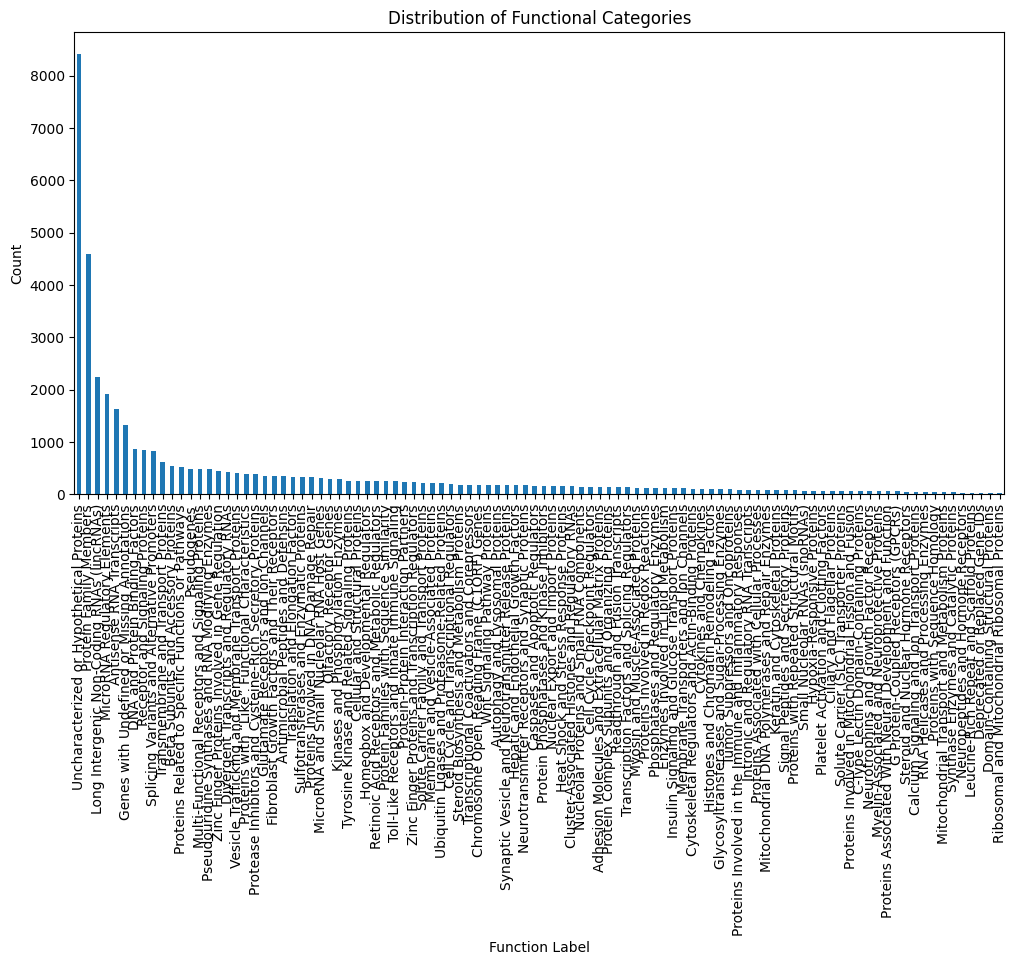

In [16]:
import matplotlib.pyplot as plt

# Plot the distribution of functional categories
label_counts = df['function_label'].value_counts()
label_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Functional Categories')
plt.xlabel('Function Label')
plt.ylabel('Count')
plt.show()